# Introducción a Python

Introducción al lenguaje Python mediante la generación de datos sintéticos para un sistema de bicicletas compartidas

In [57]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Vamos a generar datos mediante un modelo sencillo de un sistema de bicicletas compartidas y ver las características de Python.

## Modelado de un sistema de bicicletas compartidas

Empezaremos con dos estaciones, `Robledo` y `c4ta`, y un número inicial de bicicletas en cada una. Usaremos diferentes librerias para representar el *estado* del sistema y actualizaremos ese estado a medida que las bicicletas se mueven.

In [58]:
state = dict(robledo=500, c4ta=200)
bikeshare_state = pd.Series(state, name="state")

Las asignaciones entre paréntesis crean dos variables, `Robledo` y `c4ta`, y les dan valores iniciales. Podemos mostrar estas variables individualmente, o inspeccionar el objeto completo para ver todas las variables de estado.

In [59]:
bikeshare_state.robledo

np.int64(500)

Y esto:

In [60]:
bikeshare_state.c4ta

np.int64(200)

In [61]:
print("el número de bicicletas en C4ta es:", bikeshare_state.c4ta)

el número de bicicletas en C4ta es: 200


O, para mostrar todas las variables de estado y sus valores, puedes escribir solo el nombre del objeto `State`.

In [62]:
bikeshare_state

robledo    500
c4ta       200
Name: state, dtype: int64

Estos valores conforman el *estado* del sistema.

Podemos definir una función `mostrar` que muestra el estado del sistema de bicicletas compartidas como una tabla.

In [63]:
def mostrar(obj):
    """Display a Series or Namespace as a DataFrame.

    Args:
        obj (object): Series or Namespace to display.

    Returns:
        pd.DataFrame: DataFrame representation of the object.
    """
    if isinstance(obj, pd.Series):
        df = pd.DataFrame(obj)
        return df
    elif hasattr(obj, "__dict__"):
        return pd.DataFrame(pd.Series(obj.__dict__), columns=["value"])
    else:
        return obj

In [64]:
mostrar(bikeshare_state)

,state
robledo,500
c4ta,200


No es necesario usar 'mostrar', pero en algunos entormos suele verse mejor.

Podemos actualizar el estado asignando nuevos valores a las variables.

In [65]:
bikeshare_state.robledo = 499
bikeshare_state.c4ta = 201

O podemos usar *operadores de actualización*, `-=` y `+=`, para restar 1 de una estación y sumar 1 a la otra.

In [66]:
bikeshare_state.robledo -= 1
bikeshare_state.c4ta += 1

El resultado es el mismo de cualquier manera.

## Definición de funciones

Hasta ahora hemos utilizado funciones definidas en NumPy y en Pandas. Ahora vamos a definir nuestras propias funciones.

Cuando desarrollas código en Jupyter, a menudo es eficiente escribir unas pocas líneas, probarlas para confirmar que hacen lo que pretendes y luego usarlas para definir una nueva función.
Por ejemplo, estas líneas mueven una bicicleta de Robledo a C4ta:

In [68]:
bikeshare_state.robledo -= 1
bikeshare_state.c4ta += 1

En lugar de repetir estas líneas cada vez que se mueve una bicicleta, podemos definir una nueva función:

In [69]:
def bicicleta_a_c4ta():
    bikeshare_state.robledo -= 1
    bikeshare_state.c4ta += 1

`def` es una palabra especial en Python que indica que estamos definiendo una nueva función. El nombre de la función es `bicicleta_a_c4ta`. Los paréntesis vacíos indican que esta función no necesita argumentos. Los dos puntos marcan el inicio de un *bloque de código* con sangría (Indentación).

Las siguientes líneas son el *cuerpo* de la función. Tienen que ir indentadas (4 espacios).

Cuando se defina una funcion esta no tiene efecto inmediato. Es necesario llamar la función para actualizar las variables `robledo` y `c4ta`. Para *llamar* una función, escribe su nombre seguido de paréntesis.

In [70]:
bicicleta_a_c4ta()

Podemos revisarlo imprimiento el estado

In [71]:
mostrar(bikeshare_state)

,state
robledo,495
c4ta,205


Cuando no usas los parentesis pasa esto

In [72]:
bicicleta_a_c4ta


<function __main__.bicicleta_a_c4ta()>

## Print()

A medida que escribes programas más complejos, es fácil perder el hilo de lo que está ocurriendo.
Una de las herramientas más útiles para depurar es la instrucción print, que muestra texto en el cuaderno Jupyter.

Normalmente, cuando Jupyter ejecuta el código en una celda, muestra el valor de la última línea de código. Por ejemplo, si ejecutas:

In [73]:
bikeshare_state.robledo
bikeshare_state.c4ta

np.int64(205)

Jupyter ejecuta ambas líneas, pero solo muestra el valor de la segunda. Si quieres mostrar más de un valor, puedes usar instrucciones `print()`:

In [74]:
print(bikeshare_state.robledo)
print(bikeshare_state.c4ta)

495
205


Cuando llamas a `print`, puedes poner una variable entre paréntesis o proporcionar una secuencia de variables separadas por comas. Python busca los valores y los muestra en la misma línea, separados por un espacio.

In [75]:
print(bikeshare_state.robledo, bikeshare_state.c4ta)

495 205


Las sentencias `print` son útiles para depurar funciones. Por ejemplo, podemos añadir un `print` a `bicicleta_a_c4ta` para ver qué ocurre en cada llamada.

In [76]:
def bicicleta_a_c4ta():
    print('Moviendo una bicicleta a C4TA')
    bikeshare_state.robledo -= 1
    bikeshare_state.c4ta += 1

Cada vez que llamamos a esta versión de la función, muestra un mensaje, lo que puede ayudarnos a seguir el rastro de lo que está haciendo el programa.
El mensaje en este ejemplo es una cadena (string), que es una secuencia de letras y otros símbolos entre comillas.

Al igual que "Bicicleta_a_robledo, podemos definir una función que mueva una bicicleta de C4ta a Robledo:

In [ ]:
def bicicleta_a_robledo():
    print('Moviendo una bicicleta a Robledo')
    bikeshare_state.robledo += 1
    bikeshare_state.c4ta -= 1

## If()

En este punto ya tenemos funciones que simulan el movimiento de bicicletas; ahora pensemos en simular a los clientes. Un modelo simple del comportamiento de los clientes puede ser un generador de números aleatorios para determinar cuándo llegan clientes a cada estación.

Creemos una función lanzamiento que genera “lanzamientos de moneda” aleatorios. Cuando la llamas, le proporcionas una probabilidad entre 0 y 1, así:

In [77]:
# this line sets the random number generator so the results in
# np.random.seed(17)

def lanzamiento(p=0.5):
    """Lanza una moneda con la probabilidad dada.

    Args:
        p (float): Probabilidad entre 0 y 1.

    Returns:
        bool: True or False.
    """
    return np.random.random() < p

In [78]:
lanzamiento(0.7)

True

El resultado es uno de dos valores: True con probabilidad 0.7 (en este ejemplo) o False con probabilidad 0.3. Si ejecutas flip de esta manera 100 veces, deberías obtener True unas 70 veces y False unas 30 veces. Pero los resultados son aleatorios, así que pueden ser un poco diferentes a estas expectativas.

True y False son valores especiales definidos por Python. Se llaman valores booleanos porque están relacionados con el álgebra booleana.

Ten en cuenta que no son cadenas de texto (strings). Hay una diferencia entre True, que es un valor booleano, y 'True', que es una cadena.

Podemos usar valores booleanos para controlar el comportamiento del programa, mediante una instrucción if:

Podemos entregar el resultado como cara o sello

In [79]:
if lanzamiento(0.5):
    print('cara')
else:
    print('sello')

sello


Esta funcion la podemos usar para simular la llegada de estudiantes que quieren prestar una bicicleta en la estación Robledo. Supongamos que los estudiantes llegan a esta estación cada 2 minutos, en este caso la probabilida que un estudiante llegue cada minuto es del 50%, y lo simulamos de la siguiente manera.

In [88]:
if lanzamiento(0.5):
    bicicleta_a_c4ta()

Moviendo una bicicleta a C4TA


Si los estudiantes llegan a la estación de C4TA cada tres minutos, en promedio, la probabilidad de que ocurra una llegada durante cualquier período de un minuto es del 33%, y podemos simularlo de la siguiente manera:

In [89]:
if lanzamiento(0.33):
    bicicleta_a_robledo()

Podemos combinar estos fragmentos en una función que simule un paso de tiempo, que es un intervalo de tiempo, en este caso de un minuto:

In [90]:
def paso():
    if lanzamiento(0.5):
        bicicleta_a_c4ta()

    if lanzamiento(0.33):
        bicicleta_a_robledo()

Luego podemos simular un paso de tiempo llamando la función anterior

In [93]:
paso()

Moviendo una bicicleta a C4TA


Dependiendo de los resultados de flip, esta función podría mover una bicicleta a Olin, o a Wellesley, o a ninguno de los dos, o a ambos.



## Parámetros

La versión anterior de `paso` está bien si las probabilidades de llegada nunca cambian, pero en la realidad varían con el tiempo.

Así que, en lugar de poner los valores constantes 0.5 y 0.33 en `paso`, podemos reemplazarlos con *parámetros*.
Los parámetros son variables cuyos valores se establecen cuando una función es llamada.

Aquí tienes una versión de `paso` que recibe dos parámetros, `p1` y `p2`:


In [94]:
def paso(p1, p2):
    if lanzamiento(p1):
        bicicleta_a_c4ta()

    if lanzamiento(p2):
        bicicleta_a_robledo()

Los valores de `p1` y `p2` no se establecen dentro de esta función; en cambio, se proporcionan cuando la función es llamada, de esta forma:

In [95]:
paso(0.5, 0.33)

Los valores que proporcionas cuando llamas a la función se llaman **argumentos**. Los argumentos, `0.5` y `0.33` en este ejemplo, se asignan a los parámetros, `p1` y `p2`, en ese orden. Así que ejecutar esta función tiene el mismo efecto que:

In [96]:
p1 = 0.5
p2 = 0.33

if lanzamiento(p1):
    bicicleta_a_c4ta()

if lanzamiento(p2):
    bicicleta_a_robledo()

La ventaja de usar parámetros es que puedes llamar a la misma función muchas veces, proporcionando diferentes argumentos cada vez.

Agregar parámetros a una función se llama **generalización**, porque hace que la función sea más general; sin parámetros, la función siempre hace lo mismo; con parámetros, puede hacer un rango de cosas.


## Loops (Bucles)

En algún momento te cansarás de ejecutar celdas una y otra vez.
Afortunadamente, existe una manera sencilla de repetir un bloque de código: el *bucle for*. Aquí tienes un ejemplo:

In [97]:
for i in range(100):
    print(i)
    bicicleta_a_c4ta()

0
Moviendo una bicicleta a C4TA
1
Moviendo una bicicleta a C4TA
2
Moviendo una bicicleta a C4TA
3
Moviendo una bicicleta a C4TA
4
Moviendo una bicicleta a C4TA
5
Moviendo una bicicleta a C4TA
6
Moviendo una bicicleta a C4TA
7
Moviendo una bicicleta a C4TA
8
Moviendo una bicicleta a C4TA
9
Moviendo una bicicleta a C4TA
10
Moviendo una bicicleta a C4TA
11
Moviendo una bicicleta a C4TA
12
Moviendo una bicicleta a C4TA
13
Moviendo una bicicleta a C4TA
14
Moviendo una bicicleta a C4TA
15
Moviendo una bicicleta a C4TA
16
Moviendo una bicicleta a C4TA
17
Moviendo una bicicleta a C4TA
18
Moviendo una bicicleta a C4TA
19
Moviendo una bicicleta a C4TA
20
Moviendo una bicicleta a C4TA
21
Moviendo una bicicleta a C4TA
22
Moviendo una bicicleta a C4TA
23
Moviendo una bicicleta a C4TA
24
Moviendo una bicicleta a C4TA
25
Moviendo una bicicleta a C4TA
26
Moviendo una bicicleta a C4TA
27
Moviendo una bicicleta a C4TA
28
Moviendo una bicicleta a C4TA
29
Moviendo una bicicleta a C4TA
30
Moviendo una bici

La sintaxis aquí debería resultarte familiar: la primera línea termina con dos puntos, y las líneas dentro del bucle `for` están indentadas. Los otros elementos del bucle son:

* Las palabras `for` e `in` son palabras especiales que debemos usar en un bucle *for*.
* `range` es una función de Python que utilizamos para controlar cuántas veces se ejecuta el bucle.
* `i` es una *variable de bucle* que se crea cuando el bucle `for` se ejecuta.

Cuando este bucle se ejecuta, las instrucciones dentro del bucle se corren tres veces. La primera vez, el valor de `i` es `0`; la segunda vez, es `1`; la tercera vez, es `2`.

Cada vez que se recorre el bucle, se imprime el valor de `i` y se mueve una bicicleta a C4TA.


## Series de Tiempo (*TimeSeries*)

Cuando ejecutamos una simulación, a menudo queremos guardar los resultados para analizarlos más tarde. Podemos definir una función llamada `TimeSeries` para este propósito. `TimeSeries` contiene una secuencia de marcas de tiempo (*timestamps*) y una secuencia correspondiente de cantidades.


In [98]:
def TimeSeries():
    """Crea un objeto pd.Series para representar una serie temporal.

    Returns:
        pd.Series: Serie con nombre de índice 'Tiempo' y nombre 'Cantidad'.
    """

    series = pd.Series([], dtype=float)

    series.index.name = "Tiempo"
    series.name = "Cantidad"
    return series

En este ejemplo, las marcas de tiempo son números enteros que representan minutos y las cantidades son el número de bicicletas en una ubicación.

Como hemos estado moviendo varias bicicletas, empecemos de nuevo con un nuevo objeto `State`.

In [99]:
state = dict(robledo=500, c4ta=200)
bikeshare_state = pd.Series(state, name="state")

“Podemos crear un nuevo `TimeSeries` vacío de esta manera:

In [100]:
resultados = TimeSeries()

Y podemos añadir una cantidad de esta manera:

In [101]:
resultados[0] = bikeshare_state.robledo

El número entre corchetes es la marca de tiempo (**timestamp**), también llamada **etiqueta (label)**

Podemos usar un `TimeSeries` dentro de un bucle *for* para almacenar los resultados de la simulación:


In [102]:
for i in range(10000):
    print(i)
    paso(0.6, 0.6)
    resultados[i+1] = bikeshare_state.robledo

0
Moviendo una bicicleta a C4TA
Moviendo una bicicleta a Robledo
1
Moviendo una bicicleta a C4TA
Moviendo una bicicleta a Robledo
2
Moviendo una bicicleta a C4TA
Moviendo una bicicleta a Robledo
3
Moviendo una bicicleta a C4TA
Moviendo una bicicleta a Robledo
4
Moviendo una bicicleta a C4TA
5
6
Moviendo una bicicleta a Robledo
7
Moviendo una bicicleta a Robledo
8
Moviendo una bicicleta a C4TA
9
Moviendo una bicicleta a C4TA
10
Moviendo una bicicleta a C4TA
11
12
Moviendo una bicicleta a Robledo
13
Moviendo una bicicleta a C4TA
14
Moviendo una bicicleta a C4TA
Moviendo una bicicleta a Robledo
15
Moviendo una bicicleta a C4TA
Moviendo una bicicleta a Robledo
16
Moviendo una bicicleta a C4TA
17
Moviendo una bicicleta a Robledo
18
19
Moviendo una bicicleta a C4TA
Moviendo una bicicleta a Robledo
20
Moviendo una bicicleta a Robledo
21
Moviendo una bicicleta a Robledo
22
23
Moviendo una bicicleta a C4TA
24
Moviendo una bicicleta a C4TA
25
Moviendo una bicicleta a C4TA
Moviendo una bicicleta 

Cada vez que recorremos el bucle, imprimimos el valor de `i` y llamamos a `step`, que actualiza `bikeshare`.
Luego almacenamos en `results` el número de bicicletas en Olin.
Usamos la variable del bucle, `i`, para calcular la marca de tiempo (*timestamp*), que es `i+1`.

La primera vez que se ejecuta el bucle, el valor de `i` es `0`, así que la marca de tiempo es `1`.
La última vez, el valor de `i` es `2`, así que la marca de tiempo es `3`.

Cuando el bucle termina, `results` contiene 4 marcas de tiempo, desde 0 hasta 3, y el número de bicicletas en Olin al final de cada paso de tiempo.

Podemos mostrar el `TimeSeries` de esta manera:

In [103]:
mostrar(resultados)

,Cantidad
Tiempo,
0,500
1,500
2,500
3,500
4,500
...,...
9996,491
9997,490
9998,490


La columna de la izquierda son las marcas de tiempo; la columna de la derecha son las cantidades.

## Graficar (*Plotting*)

`results` proporciona una función llamada `plot` que podemos usar para graficar los resultados, y la función `decorate`, la podemos usar para etiquetar los ejes y darle un título a la figura:

In [104]:
def decorar(**options):
    """Decora los ejes actuales.

    Llama a decorar con argumentos con nombre, por ejemplo:
    decorar(title='Título',
                xlabel='x',
                ylabel='y')

    Los argumentos con nombre pueden ser cualquiera de las propiedades de los ejes:
    https://matplotlib.org/api/axes_api.html

    Args:
        **options: Argumentos con nombre para las propiedades de los ejes.
    """
    ax = plt.gca()
    ax.set(**options)

    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend(handles, labels)

    plt.tight_layout()

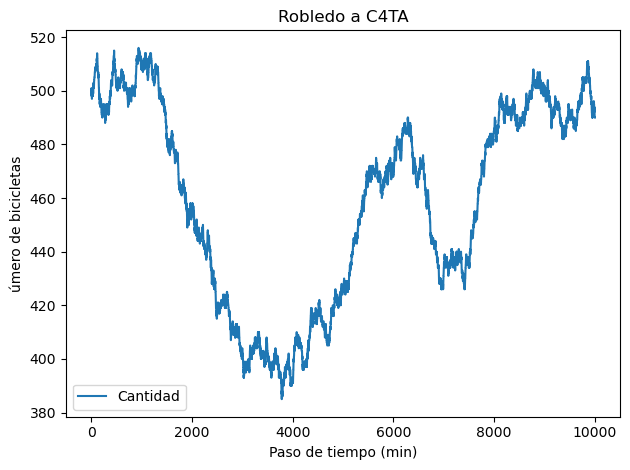

In [105]:
resultados.plot()

decorar(title='Robledo a C4TA',
         xlabel='Paso de tiempo (min)',
         ylabel='úmero de bicicletas')

El resultado debería ser una gráfica con el tiempo en el eje $x$ y el número de bicicletas en el eje $y$.
Como solo ejecutamos tres pasos de tiempo, puede que no sea muy interesante.


### Guardar un dataframe o serie de Pandas a un CSV

In [106]:
resultados.to_csv('resultados_bikeshare.csv')

## Resumen

Este capítulo introduce las herramientas que necesitamos para ejecutar simulaciones, registrar los resultados y graficarlos.

Usamos un objeto `State` para representar el estado del sistema.
Luego utilizamos la función `lanzamiento` y una instrucción `if` para simular un solo paso de tiempo.
Usamos un bucle `for` para simular una serie de pasos y la funcion `TimeSeries` para registrar los resultados.
Finalmente, usamos `plot` y `decorate` para graficar los resultados.

En el siguiente capítulo, ampliaremos esta simulación para hacerla un poco más realista.

## Ejercicios

Antes de continuar, quizá quieras trabajar en los siguientes ejercicios.


### Ejercicio 1

¿Qué pasa si escribes mal el nombre de una variable de estado?
Edita la siguiente celda, cambia la escritura de `C4TA` y ejecútala.

El mensaje de error utiliza la palabra *attribute* (atributo), que es otro nombre para lo que estamos llamando una variable de estado.

In [ ]:
state = dict(robledo=10, c4ta=2)
bikeshare_state = pd.Series(state, name="state")

bikeshare_state.robledo

### Ejercicio 3

Envuelve el código (crea un Wrapper) de lo visto previamente en una función llamada `run_simulation` que reciba tres parámetros: `p1`, `p2` y `num_pasos`.

Debe hacer lo siguiente:

1. Crear un objeto `TimeSeries` para guardar los resultados.
2. Usar un bucle *for* para ejecutar `paso` el número de veces especificado por `num_pasos`, pasando los valores de `p1` y `p2`.
3. Después de cada paso, guardar en el `TimeSeries` el número de bicicletas en C4TA.
4. Al finalizar el bucle, graficar los resultados.
5. Decorar los ejes.

Para probar tu función:

1. Crea un objeto `State` con el estado inicial del sistema.
2. Llama a `run_simulation` con los parámetros `p1=0.3`, `p2=0.2` y `num_steps=60`.


In [ ]:
# Aqui va la solucion

## Información adicional

Esta sección contiene información adicional sobre las funciones que hemos usado y referencias a su documentación.


Los objetos `State` y `TimeSeries` están basados en el objeto `Series` definido por la librería **Pandas**.
La documentación está en [https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html).

Los objetos `Series` proporcionan su propia función `plot`, por eso la llamamos de esta forma:

```python
resultados.plot()
```

En lugar de así:

```python
plot(resultados)
```

Puedes leer la documentación de `Series.plot` en:
[https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html).


`decorar` está basado en **Matplotlib**, que es una librería de gráficos muy utilizada en Python.
Matplotlib proporciona funciones separadas para `title`, `xlabel` y `ylabel`.
`decorar` las hace un poco más fáciles de usar.

Para ver la lista de argumentos con nombre (*keyword arguments*) que puedes pasar a `decorar`, consulta:
[https://matplotlib.org/3.2.2/api/axes\_api.html?highlight=axes#module-matplotlib.axes](https://matplotlib.org/3.2.2/api/axes_api.html?highlight=axes#module-matplotlib.axes).

La función `lanzamiento` utiliza la función `random` de **NumPy** para generar un número aleatorio entre 0 y 1, y luego devuelve `True` o `False` con la probabilidad indicada.

Puedes obtener el código fuente de `lanzamiento` (o de cualquier otra función) ejecutando la siguiente celda.


In [ ]:
print(inspect.getsource(lanzamiento))